# EP 1
**Diogo José Costa Alves (13709881)**

In [4]:
cpu_info()

CPU(s):                          4
Nome do modelo:                  Intel(R) Core(TM) i5 CPU       M 520  @ 2.40GHz
Thread(s) per núcleo:            2


# A tarefa e medir o tempo de execucao do medio das tres versoes do programa para diferentes tamanhos de entrada (grid_size) e nas versoes paralelizadas, medir para diferentes numeros de threads (num_threads)

```
grid_size = 32, 64, 128, 256, 512, 1024, 2048, 4096
num_threads = 1, 2, 4, 8, 16, 32 (versoes com omp e pth)
```

In [37]:
grid_sizes = (32, 64, 128, 256, 512, 1024, 2048, 4096)
num_threads = (1, 2, 4, 8, 16, 32)
samples_per_evaluation = 10


In [57]:

# grid_sizes = (32, 64)
# num_threads = (1, 2, 4, 8, 16, 32)
def experiment(results):
  results = []
  impls = ('omp',)

  total_evaluations = samples_per_evaluation * len(grid_sizes) * len(num_threads) * len(impls)

  print(f'''
      grid_sizes: {grid_sizes}
      num_threads: {num_threads}
      impls: {impls}
      samples_per_evaluation: {samples_per_evaluation}
      total_evaluations: {total_evaluations} ''')
  
  with tqdm(total=total_evaluations) as pbar:
    for impl in impls:
      for grid_size in grid_sizes:
        for num_thread in num_threads:
          for _ in range(samples_per_evaluation):
            t = {'impl': impl, 'grid_size': grid_size, 'num_thread': 1}
            print(f'{t}')
            seconds = time_test(grid_size, impl, num_thread)
            results.append({'impl': impl, 'grid_size': grid_size, 'num_thread': 1, 'seconds': seconds})
            pbar.update(1)

  
  return results

results = experiment(results)  


      grid_sizes: (32, 64, 128, 256, 512, 1024, 2048, 4096)
      num_threads: (1, 2, 4, 8, 16, 32)
      impls: ('omp',)
      samples_per_evaluation: 10
      total_evaluations: 480 


  0%|          | 0/480 [00:00<?, ?it/s]

{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}
{'impl': 'omp', 'grid_size': 32, 'num_thread': 1}


KeyboardInterrupt: 

In [38]:
create_baseline(grid_sizes, samples_per_evaluation)


    grid_sizes: (32, 64, 128, 256, 512, 1024, 2048, 4096)
    samples_per_evaluation: 10
    total_evaluations: 80 


  0%|          | 0/80 [00:00<?, ?it/s]

----
# Anexos

### Código do experimento

In [1]:
import numpy as np
import pandas as pd
import subprocess
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from os.path import exists

CSV_RAW_FILE = 'ep1_diogo_alves_results_raw.csv'
CSV_SUMMARY_FILE = 'ep1_diogo_alves_results_summary.csv'

def cpu_info(): 
  command = "lscpu | grep -Ei '^Cpu\(s\):|thread|core'"
  subprocess.Popen(command, shell=True).wait()
  return None

def check(grid_size, num_threads):
  cmd = ['./check', '--grid_size',  str(grid_size), '--num_threads', str(num_threads)]
  result = False
  with subprocess.Popen(cmd, stdout=subprocess.PIPE, cwd='src') as proc:
    output = str(proc.stdout.read())
    result = 'OpenMP igual ao sequencial' in output and 'Pthreads igual ao sequencial' in output
    return result

def check_all_combinations():
  total_evaluations = len(grid_sizes) * len(num_threads)
  with tqdm(total=total_evaluations) as pbar:
    for grid_size in grid_sizes:
      for num_thread in num_threads:
          is_OK = check(grid_size, num_thread)
          if not is_OK:
            print(f'Check failed for grid_size={grid_size} and num_thread={num_thread}!!!')
            return False
          pbar.update(1)
  print('Check passed for all combinations ✅✅✅')

def time_test(grid_size, impl, num_threads=1):
  cmd = ['./time_test', '--grid_size',  str(grid_size), '--impl', impl,'--num_threads', str(num_threads)]
  with subprocess.Popen(cmd, stdout=subprocess.PIPE, cwd='src') as proc:
    seconds = float(proc.stdout.read())
    return seconds
  
def load_results():
  results_found = exists(CSV_RAW_FILE)
  if results_found:
    print('Results found. Loading data to workspace...')
    results = pd.read_csv(CSV_RAW_FILE)
  return results

def create_baseline(grid_sizes, samples_per_evaluation):
  results = []
  total_evaluations = samples_per_evaluation * len(grid_sizes) 

  print(f'''
    grid_sizes: {grid_sizes}
    samples_per_evaluation: {samples_per_evaluation}
    total_evaluations: {total_evaluations} ''')
  
  with tqdm(total=total_evaluations) as pbar:
    for grid_size in grid_sizes:
      for _ in range(samples_per_evaluation):
        seconds = time_test(grid_size, 'seq')
        results.append({'impl': 'seq', 'grid_size': grid_size, 'num_thread': 1, 'seconds': seconds})
        pbar.update(1)
  
  results = pd.DataFrame(results)
  results.to_csv(CSV_RAW_FILE, index=False)


In [42]:
results = load_results()
results.dtypes

Results found. Loading data to workspace...


impl              object
grid_size          int64
number_thread      int64
seconds          float64
dtype: object

/tmp/ipykernel_67111/3704623840.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results, x='grid_size', y='seconds', marker='o', markerfacecolor='orangered', markersize=5, palette = "Set2")


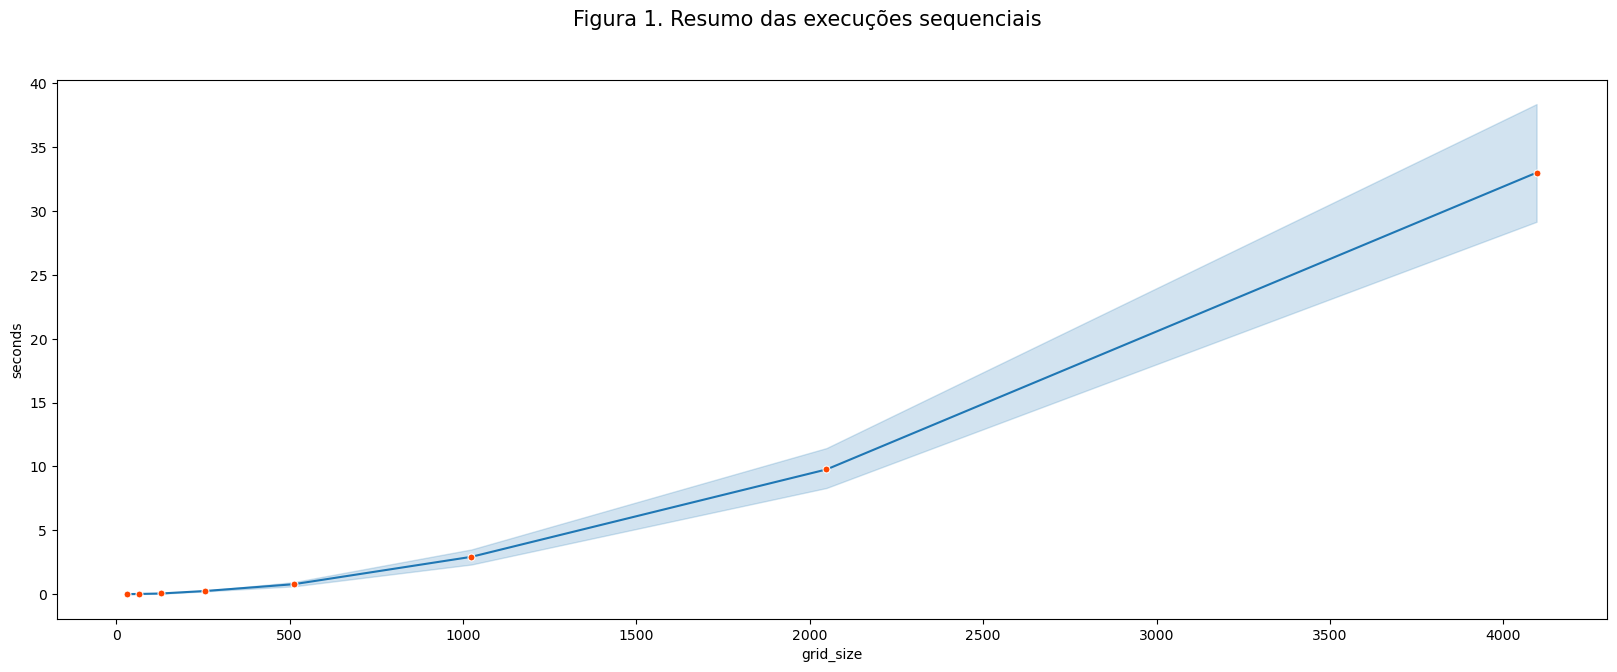

In [50]:
def figura_1():
  fig, ax = plt.subplots(1,1,figsize=(20,7))
  fig.suptitle("Figura 1. Resumo das execuções sequenciais", fontsize=15)
  sns.lineplot(data=results, x='grid_size', y='seconds', marker='o', markerfacecolor='orangered', markersize=5, palette = "Set2")

figura_1()